In [1]:
from importlib import reload

from pandas import DataFrame

%cd /root/rolling-pin/python
from rolling_pin import tools, utils, blob_etl
from rolling_pin.blob_etl import BlobETL
reload(tools)
reload(blob_etl)

/root/rolling-pin/python


<module 'rolling_pin.blob_etl' from '/root/rolling-pin/python/rolling_pin/blob_etl.py'>

## BLOB DATA WITH A REPEATING STRUCTURE

In [2]:
blob = dict(
    a=dict(
        b=[
            dict(            # <--|
                c='foo',     #    |   repeated structure
                d=dict(      #    |__   of 2 branches
                    e='taco' #    |   a/b/list/c and a/b/list/d/e  
                )            #    |
            ),               # <--|
            dict(
                c='foo',
                d=dict(
                    e='pizza'
                )
            ),
            dict(
                c='bar',
                d=dict(
                    e='taco'
                )
            ),
            dict(
                c='foo',
                d=dict(
                    e='kiwi'
                )
            ),
            dict(
                c='bar',
                d=dict(
                    e='pizza'
                )
            )
        ]
    )
)

## ETL OF BLOB DATA
* ### Notice the repetative topology

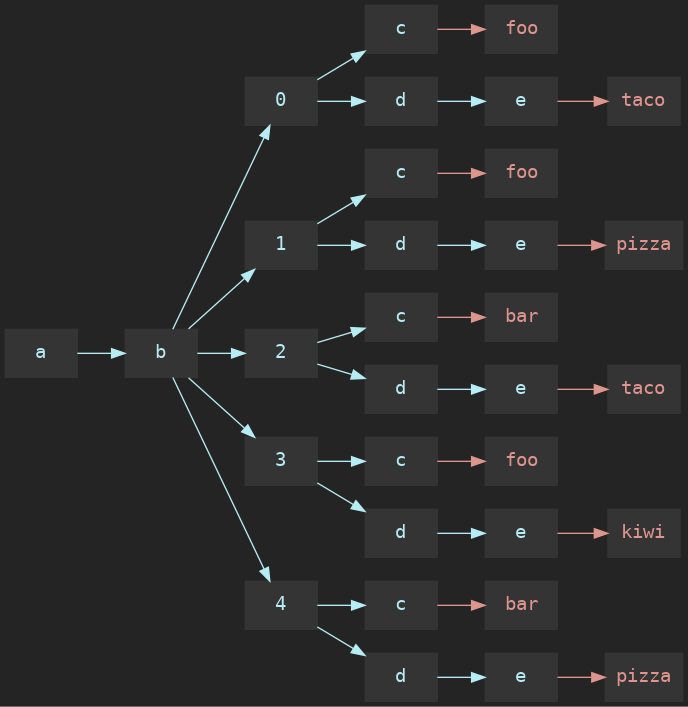

In [3]:
etl = BlobETL(blob)
etl.to_html(orient='lr', as_png=True)

## PROTOTYPE OF BLOB DATA
* ### Notice that the key value pairs at the end of the branches
* ### They constitute the unique value and count thereof for the two prototypical branches of the blob data (ie histograms)
* ### For instance, under the a/b/list/d/e branch the word "pizza" appears 2 times

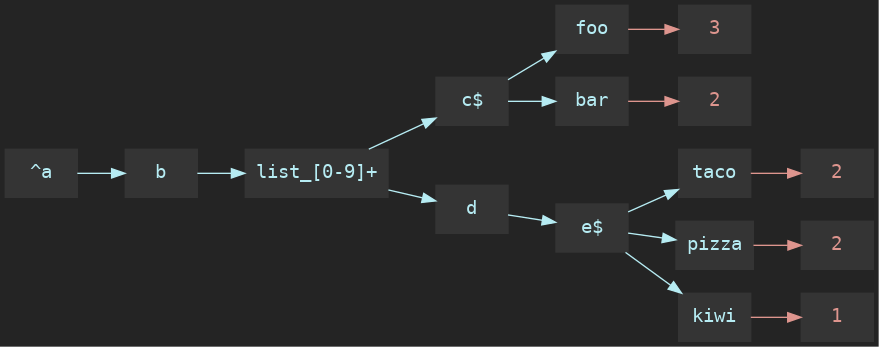

In [4]:
proto = etl.to_prototype()
proto.to_html(orient='lr', as_png=True)

## PROTOTYPICAL TOPOLOGY (ie protype without values)
* ### The fundamental structure that is repeated throughout the original blob data
* ### Think of this as the union of every unique topology within the blob data

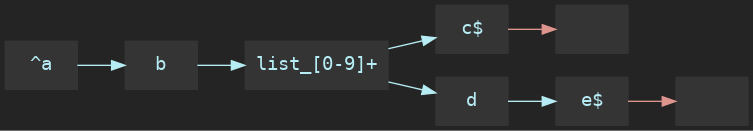

In [5]:
proto.set(value_setter=lambda k, v: '').to_html(orient='lr', as_png=True)

## PROTOTYPICAL FLAT DICTIONARY

In [6]:
proto.to_flat_dict()

{'^a/b/<list_[0-9]+>/c$': Counter({'foo': 3, 'bar': 2}),
 '^a/b/<list_[0-9]+>/d/e$': Counter({'taco': 2, 'pizza': 2, 'kiwi': 1})}

## DATAFRAME OF BLOB DATA

In [7]:
etl.to_dataframe()

,0,1,2,3,4,value
0,a,b,<list_0>,c,NaN,foo
1,a,b,<list_0>,d,e,taco
2,a,b,<list_1>,c,NaN,foo
3,a,b,<list_1>,d,e,pizza
4,a,b,<list_2>,c,NaN,bar
5,a,b,<list_2>,d,e,taco
6,a,b,<list_3>,c,NaN,foo
7,a,b,<list_3>,d,e,kiwi
8,a,b,<list_4>,c,NaN,bar
9,a,b,<list_4>,d,e,pizza


## DATAFRAME OF PROTOTYPE

In [7]:
temp = BlobETL(proto.to_flat_dict(), separator='#').to_dataframe()
temp

,0,value
0,^a/b/<list_[0-9]+>/c$,"{'foo': 3, 'bar': 2}"
1,^a/b/<list_[0-9]+>/d/e$,"{'taco': 2, 'pizza': 2, 'kiwi': 1}"


## PROTOTYPE DATAFRAME CONVERTED TO 1 PDF PER KEY

In [8]:
data = DataFrame(temp.value.tolist())
data = data.apply(lambda x: x / x.sum(), axis=1)
data['key'] = temp[0]
data

,bar,foo,kiwi,pizza,taco,key
0,0.4,0.6,NaN,NaN,NaN,^a/b/<list_[0-9]+>/c$
1,NaN,NaN,0.2,0.4,0.4,^a/b/<list_[0-9]+>/d/e$
